# Adult Census Income

# I. EDA & Visualization

## 1. Importing libraries & Ingesting data

In [1]:
# Github: https://github.com/hail2222/Adult-Census-Income

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ingest data from csv file
df = pd.read_csv('adult.csv')

# overview basic information of the dataset
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 2. Data Wrangling & Processing

In [2]:
# check null values
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [3]:
# print the count of '?' for each column
print ("   Counts of ? in each columns")
print ("==================================")
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    for j in index:
        temp = 0
        if j == '?':
            temp=t['?']
            print("# of ? in", i,":", temp)
            break
    if(temp==0):
        print("# of ? in", i,":", temp)

   Counts of ? in each columns
# of ? in age : 0
# of ? in workclass : 1836
# of ? in fnlwgt : 0
# of ? in education : 0
# of ? in education.num : 0
# of ? in marital.status : 0
# of ? in occupation : 1843
# of ? in relationship : 0
# of ? in race : 0
# of ? in sex : 0
# of ? in capital.gain : 0
# of ? in capital.loss : 0
# of ? in hours.per.week : 0
# of ? in native.country : 583
# of ? in income : 0


In [4]:
# drop all '?' in 'workclass'
df = df[df.workclass != '?']

# drop all '?' in 'occupation'
df = df[df.occupation != '?']

# drop all '?' in 'native.country'
df = df[df['native.country'] != '?']

## 3. Data Visualization

In [5]:
import seaborn as sns

sns.set_palette('Pastel1')

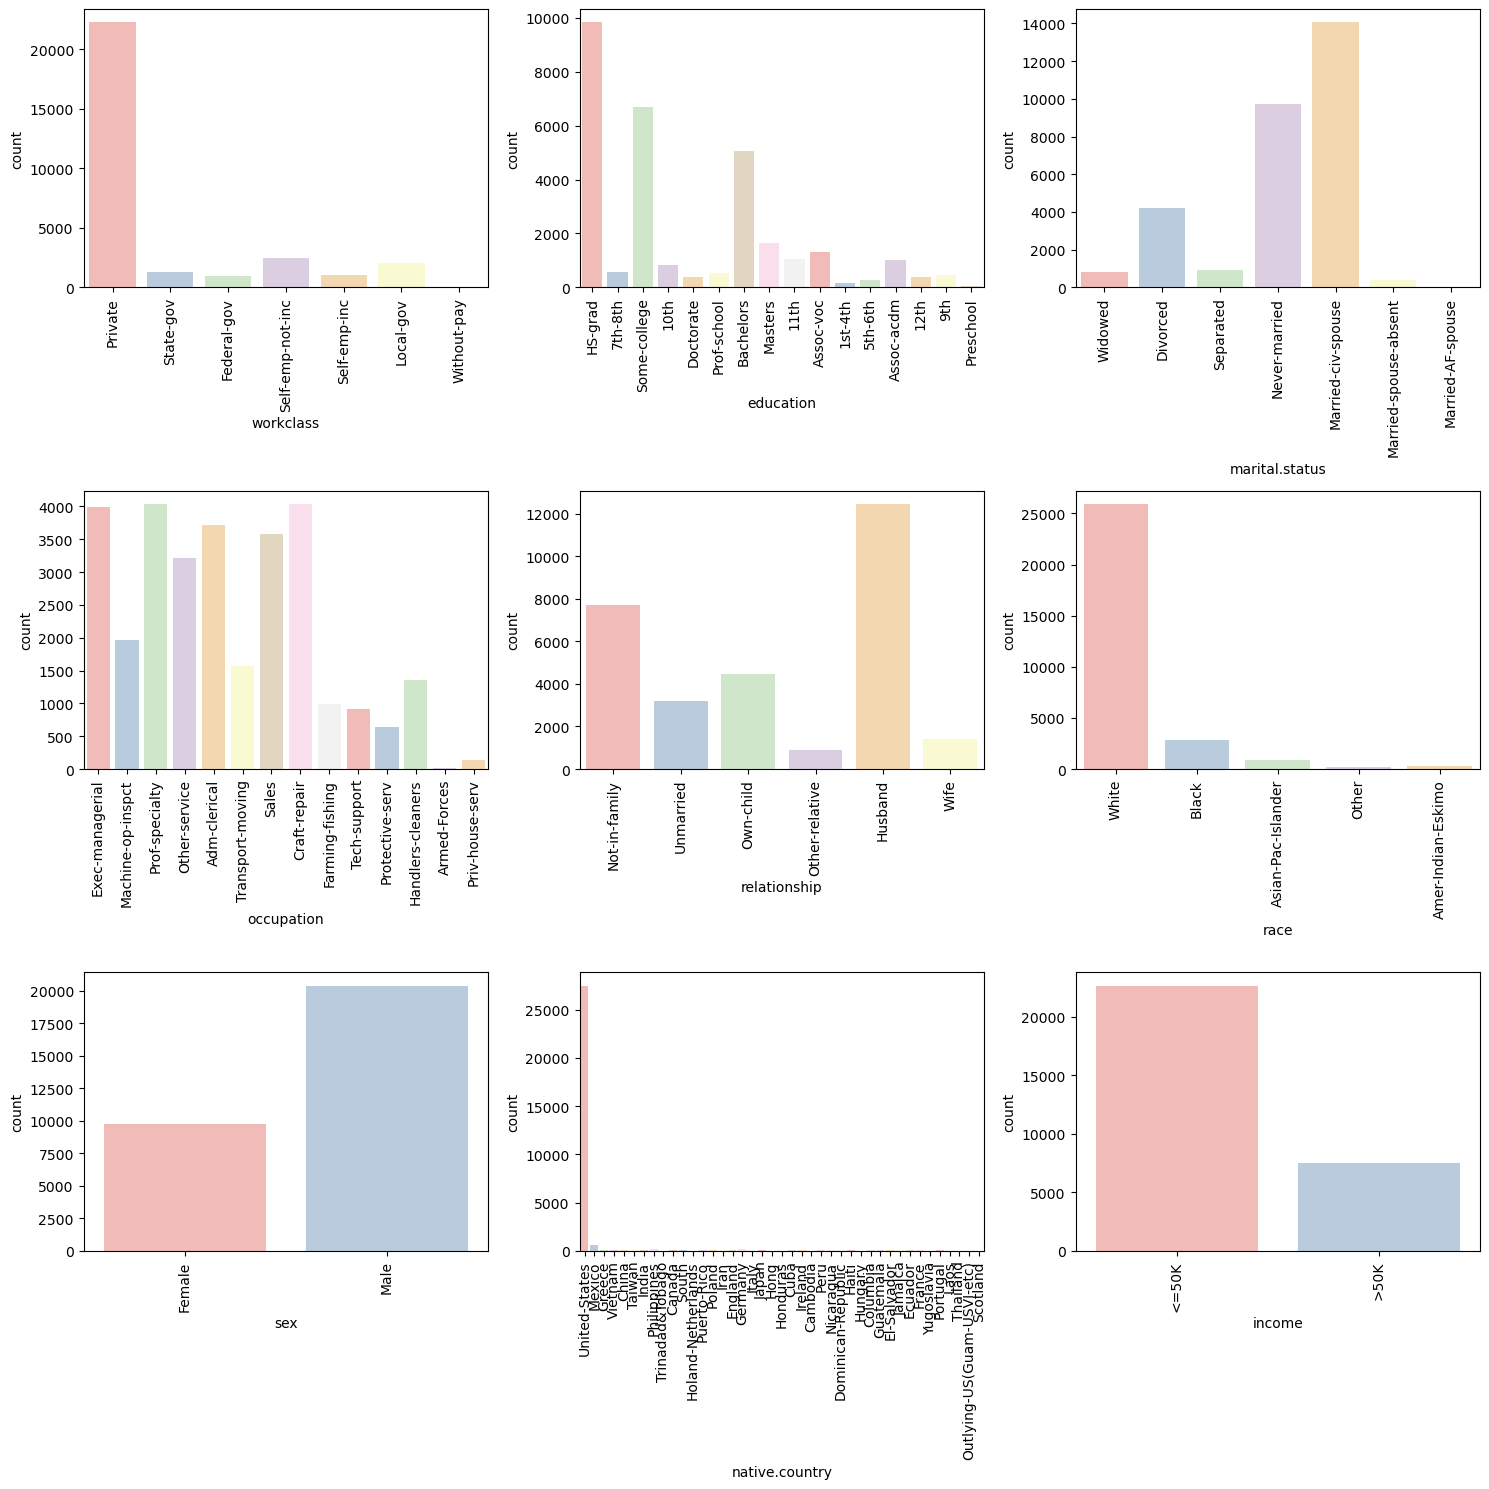

In [6]:
# plot bar graphs for each categorical columns
cat_list = ['workclass', 'education', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex', 'native.country', 'income']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(cat_list):
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3], palette= 'Pastel1')
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()

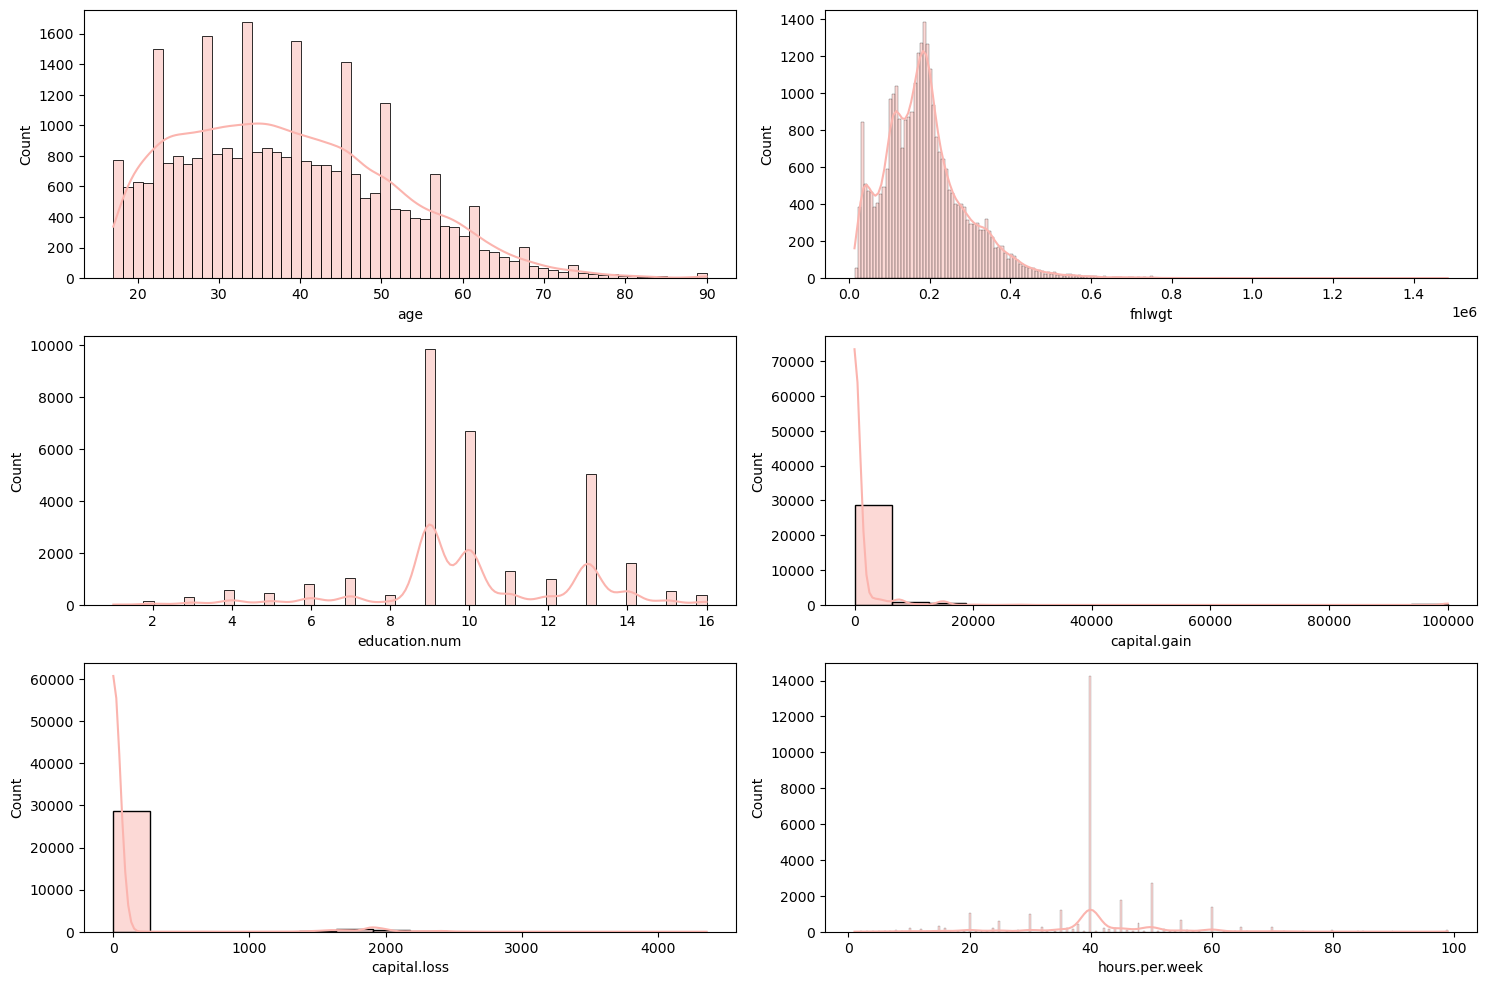

In [7]:
#numerical columns
num_list = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, col in enumerate(num_list):
    sns.histplot(x=col, data=df, ax=axes[i//2, i%2], kde=True)
    
plt.tight_layout()
plt.show()

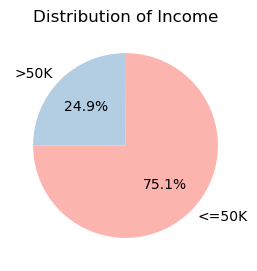

In [8]:
# Count values in the 'income' column
income_cnts = df['income'].value_counts()
labels = income_cnts.index
sizes = income_cnts.values

# draw a pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',
        startangle=180)
plt.title("Distribution of Income")
plt.show()

In [9]:
# process the data to convert the string-type 'income' column to 0 or 1
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

<Axes: xlabel='age', ylabel='Count'>

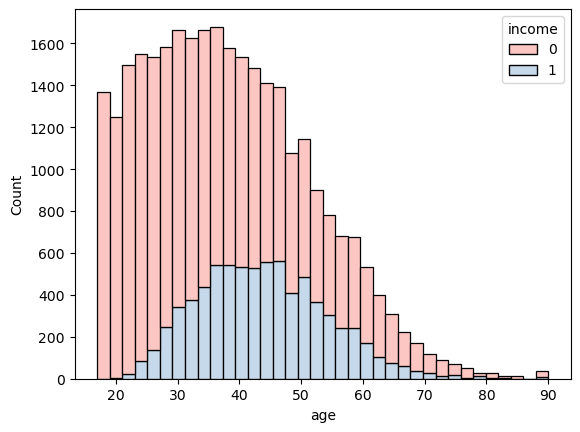

In [10]:
# 0: <=50K, 1: >50K
# age by count and income 
sns.histplot(df, x='age', hue='income', bins= 36, multiple='stack')

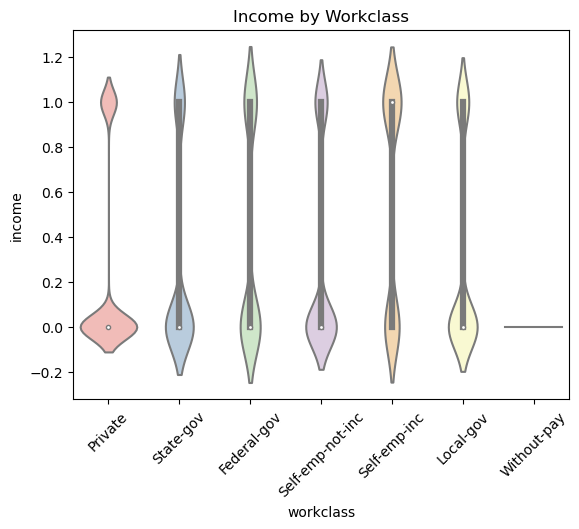

In [11]:
# income by workclass violin plot
sns.violinplot(x='workclass', y='income', data=df)
plt.title("Income by Workclass")
plt.xticks(rotation=45)
plt.show()

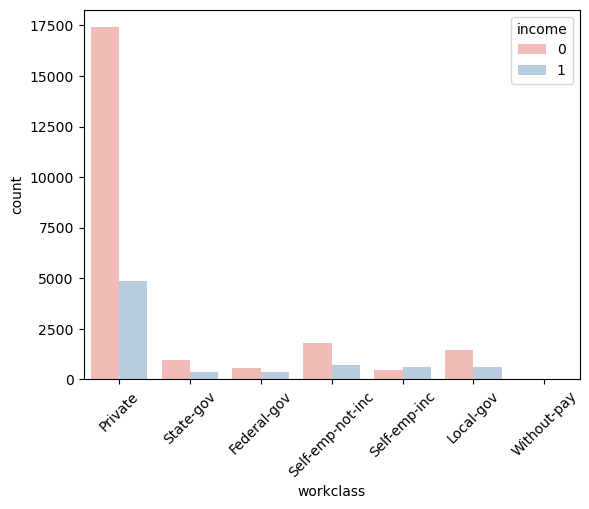

In [12]:
# workclass count separated by income histogram
sns.countplot(data = df, x = 'workclass', hue = 'income')
plt.tick_params(axis='x', rotation=45)

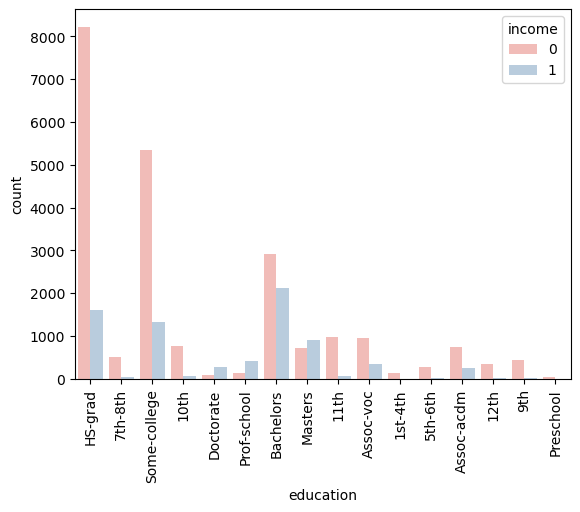

In [13]:
# Education count separated by income histogram
sns.countplot(data = df, x = 'education', hue = 'income')
plt.tick_params(axis='x', rotation=90)

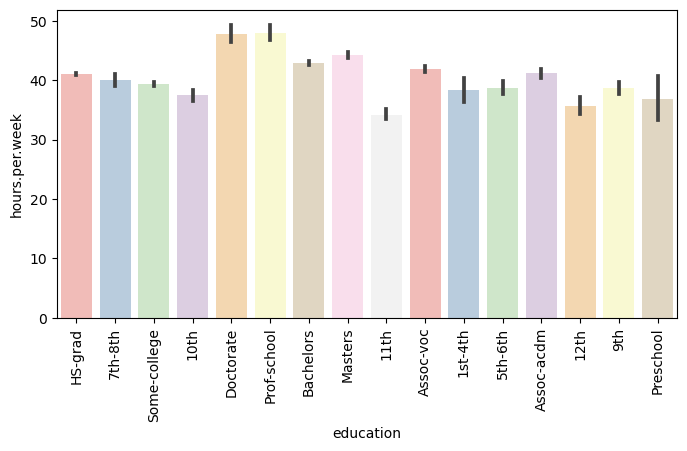

In [14]:
# hours.per.week by education
plt.figure(figsize=(8, 4))
sns_grad = sns.barplot(x = 'education', y = 'hours.per.week', palette='Pastel1', data = df)
plt.tick_params(axis='x', rotation=90)

## 3. More Data Wrangling

In [15]:
# before
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [16]:
# Categorical Values to Numerical values
categorical_columns = list(df.select_dtypes(include=['object']).columns)
numeric_values = {}
for i, feature in enumerate(categorical_columns):
    numeric_values[feature] = LabelEncoder()
    df[feature] = numeric_values[feature].fit_transform(df[feature])
# after
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


# II. Machine Learning Models: 
# Logistic Regression, Random Forest, Support Vector Machine

## 1. Importing libraries

In [17]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings; warnings.simplefilter('ignore')

## 2. Data Processing (Already done above and continue..)

In [18]:
# delete redundant data
df_adult = shuffle(df)
df_adult = df_adult.drop_duplicates(keep = 'first')

# divide dataset into train-set and test-set
features_ = df_adult.drop(columns = ['income', 'education.num'])
target = df_adult['income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (21097, 13)
Test data set size :  (9042, 13)


## 3. Machine Learning

### 3.1 Logistic Regression

In [19]:
# train model
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# prediction
pred_1 = model_1.predict(X_test)

print ("The accuracy of Logistic Regression : ",accuracy_score(y_test, pred_1))
print ("The f1 score of Logistic Regression : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of Logistic Regression :  0.7917496129174961
The f1 score of Logistic Regression :  0.40655531043176807


### 3.2 Random Forest Classifier

In [20]:
# train model
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# prediction
pred_2 = model_2.predict(X_test)

print ("The accuracy of Random Forest Classifier : ",accuracy_score(y_test, pred_2))
print ("The f1 score of Random Forest Classifier : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of Random Forest Classifier :  0.8591019685910197
The f1 score of Random Forest Classifier :  0.6855873642645607


### 3.3 Support Vector Machine

In [21]:
# train model
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)
model_3 = svc.fit(X_train, y_train)

# prediction
pred_3 = model_3.predict(X_test)

print ("The accuracy of Support Vector Machine : ",accuracy_score(y_test, pred_3))
print ("The f1 score of Support Vector Machine : ", f1_score(y_test, pred_3, average = 'binary'))

The accuracy of Support Vector Machine :  0.32050431320504313
The f1 score of Support Vector Machine :  0.37036277925804467


## 4. Results

In [22]:
list_pred = [pred_1, pred_2, pred_3]
model_names = ["Logistic Regression", "Random Forest", "Support Vector Machine"]

for i, predictions in enumerate(list_pred) :
    print ("==========================", model_names[i], "==========================")
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

========================== Logistic Regression ==========================

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      6867
        >50K       0.65      0.30      0.41      2175

    accuracy                           0.79      9042
   macro avg       0.73      0.62      0.64      9042
weighted avg       0.77      0.79      0.76      9042

========================== Random Forest ==========================

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6867
        >50K       0.74      0.64      0.69      2175

    accuracy                           0.86      9042
   macro avg       0.82      0.78      0.80      9042
weighted avg       0.85      0.86      0.86      9042

========================== Support Vector Machine ==========================

              precision    recall  f1-score   support

       <=50K       0.75      0.16      0.26      6867
        >50K   